<a href="https://colab.research.google.com/github/casjunior93/Tera---Desafio-de-classificacao/blob/main/TERA_Desafio_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio de Detecção e Redução de Fraudes no Setor Financeiro**

O desafio é propor uma solução para detecção e análise de fraudes que possam reduzir os riscos da empresa de crédito em que trabalho e garantir margens saudáveis.

Link do dataset: https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view

Vou começar importando as bibliotecas iniciais:

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Agora importo os dados:

In [2]:
df = pd.read_csv('./fraud_detection_dataset.csv')

Visualizo as dimensões do dataframe:

In [3]:
df.shape

(6362620, 11)

Vou retornar 10 linhas aleatórias para visualizar o dataframe:

In [4]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1972852,178,CASH_IN,95464.46,C147504212,30699.0,126163.46,C1907559960,298347.53,202883.07,0,0
4854962,347,CASH_IN,237724.49,C1471333108,42234.0,279958.49,C1893884359,62341.50,0.00,0,0
5487273,380,PAYMENT,13819.13,C1542626392,28782.0,14962.87,M1809623307,0.00,0.00,0,0
4628929,329,CASH_OUT,420914.50,C1153582992,161.0,0.00,C1888641457,991360.84,1412275.34,0,0
4416519,322,CASH_IN,202325.98,C1200529749,34602.0,236927.98,C1507955018,47136.63,0.00,0,0
4106769,302,CASH_OUT,241156.70,C1597962167,0.0,0.00,C634632814,495991.64,737148.34,0,0
3774179,280,CASH_OUT,73337.73,C1523450434,0.0,0.00,C884170743,1232853.19,1306190.92,0,0
5944258,405,TRANSFER,212554.40,C671103737,29961.0,0.00,C335696016,182417.73,394972.13,0,0
1712705,160,CASH_OUT,131318.49,C1166168395,0.0,0.00,C62817561,1247626.44,1378944.93,0,0
6160670,549,PAYMENT,2087.38,C1481547206,0.0,0.00,M459601948,0.00,0.00,0,0


## Conhecendo as features deste dataset:

* `step` - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

* `type` - Tipo: tipo de transação (depósito, saque, débito, pagamento e transferência);

* `amount` - Quantia: total que foi transacionado;

* `nameOrig` - ClienteOrigem: cliente que iniciou a transação

* `oldbalanceOrg` - SaldoInicialOrigem: saldo da conta de origem antes da transação;

* `newbalanceOrig` - SaldoFinalOrigem: saldo da conta de origem após a transação;

* `nameDest` - ClienteDestino: cliente de destino da transação;

* `oldbalanceDest` - SaldoInicialDestino: saldo da conta de destino antes da transação;

* `newbalanceDest` - SaldoFinalDestino: saldo da conta de destino após a transação;

* `isFraud` - ÉFraude: flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

* `isFlaggedFraud` - SinalizadaComoFraude: automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

# Pré-análise dos dados com SeetViz

Primeiro vou renomear as tabelas para facilitar a análise.

In [5]:
df = df.rename(
    columns={"step":"totalHoras", "type": "tipoTransacao", "amount": "quantia",
             "nameOrig": "clienteOrigem", "oldbalanceOrg": "saldoInicialOrigem",
             "newbalanceOrig": "saldoFinalOrigem", "nameDest": "clienteDestino",
             "oldbalanceDest": "saldoInicialDestino", "newbalanceDest": "saldoFinalDestino",
             "isFraud": "ehFraude", "isFlaggedFraud": "sinalizadaComoFraude"

             })
df.head(3)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


Agora importo o SweetViz

In [6]:
#!pip install sweetviz
#import sweetviz

O SeetViz gera um relatório em HTML com várias informações sobre as features do dataset.

In [7]:
#analise=sweetviz.analyze(df)
#analise.show_html()

Ao analisar o relatório do SweetViz, vi que o dataset tem 3 features categóricas (tipoTransacao, ehFraude e sinalizadaComoFraude), 6 numéricas (totalHoras, quantia, saldoInicialOrigem, saldoFinalOrigem, saldoInicialDestino e saldoFinalDestino) e 2 textuais (clienteOrigem, clienteDestino). Nenhuma feature tem valores faltantes.

# Tratamento de Dados

Vou tratar a feature categórica tipoTransacao com o método get_dummies do Pandas.

In [8]:
df.tipoTransacao.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df2 = pd.get_dummies(df.tipoTransacao)

A coluna tipoTransacao tem 5 valores únicos. Com o método get_dummies será criado uma coluna em um novo dataframe para cada valor único. Para cada transação, o tipo dessa transação vai receber o valor 1.

In [10]:
df2.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


Agora concateno o df2 com o dataframe original df.

In [11]:
df3 = pd.concat([df, df2], axis='columns')
df3.sample(10)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1441394,140,CASH_OUT,131651.54,C1259296380,0.00,0.00,C634490530,157686.50,289338.04,0,0,0,1,0,0,0
1372760,138,CASH_OUT,243702.08,C46273318,0.00,0.00,C1635437135,247122.19,552047.25,0,0,0,1,0,0,0
4964331,351,CASH_OUT,284255.79,C1559776679,20909.00,0.00,C1262421210,5014496.64,5298752.43,0,0,0,1,0,0,0
1754289,161,CASH_OUT,338101.02,C105050418,0.00,0.00,C1835980384,538773.62,876874.64,0,0,0,1,0,0,0
5256239,371,CASH_IN,153375.71,C785337113,40533.00,193908.71,C961601121,0.00,0.00,0,0,1,0,0,0,0
570995,23,PAYMENT,7051.58,C1095356539,0.00,0.00,M117250379,0.00,0.00,0,0,0,0,0,1,0
4004030,298,CASH_IN,565964.01,C259958371,30714.00,596678.01,C1546125501,176942.43,0.00,0,0,1,0,0,0,0
2001064,179,PAYMENT,8047.99,C939240150,0.00,0.00,M524609326,0.00,0.00,0,0,0,0,0,1,0
1124273,130,CASH_OUT,369781.26,C403436093,5002.00,0.00,C1695007132,0.00,369781.26,0,0,0,1,0,0,0
5891749,403,CASH_IN,646088.04,C1707613441,2971672.47,3617760.50,C1996231083,4896789.07,4250701.04,0,0,1,0,0,0,0


Agora vou dropar a coluna tipoTransacao.

In [12]:
df3.drop('tipoTransacao', axis='columns', inplace=True)
df3.sample(3)

,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1797048,162,872.22,C71349789,0.0,0.00,C1138397323,380298.33,381170.54,0,0,0,1,0,0,0
391289,17,371979.08,C213114754,335707.3,0.00,C280328448,0.00,371979.08,0,0,0,1,0,0,0
1678372,159,80733.59,C708305558,401727.0,482460.59,C1605366554,0.00,287042.75,0,0,1,0,0,0,0


E renomear as novas colunas

In [13]:
df3 = df3.rename(
    columns={"CASH_IN":"deposito", "CASH_OUT": "saque", "DEBIT": "debito",
             "PAYMENT": "pagamento", "TRANSFER": "transferencia",
             })
df3.head(3)

,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1


Criando uma nova coluna. Percebi que na metade das transações marcadas como fraude, o valor de saldoFinalOrigem acaba ficando menor que o valor de saldoFinalDestino.

In [14]:
print(f'(Soma das fraudes: {df3.ehFraude.loc[df3.ehFraude == 1].count()})')
print(f'Soma das fraudes onde o saldoFinalDestino é maior que saldoFinalOrigem: {df3.ehFraude.loc[(df3.saldoFinalDestino > df3.saldoFinalOrigem) & df3.ehFraude == 1].count()}')

(Soma das fraudes: 8213)
Soma das fraudes onde o saldoFinalDestino é maior que saldoFinalOrigem: 4122


In [15]:
df3['saldoFinalDestinoMenosSaldoFinalOrigem'] = df3['saldoFinalDestino'] - df3['saldoFinalOrigem']

Criando outra nova coluna com o número de transações que o clienteOrigem iniciou no período e outra com o número de transações que um clienteDestino pode ter participado.

In [16]:
clienteOrigemNP = df3.clienteOrigem.to_numpy()
clienteDestinoNP = df3.clienteDestino.to_numpy()

In [17]:
from collections import Counter

In [18]:
contadorCO = Counter(clienteOrigemNP)
contadorCD = Counter(clienteDestinoNP)

In [19]:
df_contadorCO = pd.DataFrame.from_dict(contadorCO, orient='index').reset_index()
df_contadorCO = df_contadorCO.rename(columns={ 0:'contador'})
df_contadorCO.set_index('index',inplace=True)
df_contadorCO.head(10)

,contador
index,
C1231006815,1
C1666544295,1
C1305486145,1
C840083671,1
C2048537720,1
C90045638,1
C154988899,1
C1912850431,1
C1265012928,1


In [20]:
df_contadorCD = pd.DataFrame.from_dict(contadorCD, orient='index').reset_index()
df_contadorCD = df_contadorCD.rename(columns={0:'contador'})
df_contadorCD.set_index('index',inplace=True)
df_contadorCD.head(10)

,contador
index,
M1979787155,1
M2044282225,1
C553264065,44
C38997010,41
M1230701703,1
M573487274,1
M408069119,1
M633326333,1
M1176932104,1


In [21]:
print(contadorCO['C1305486145'])
print(contadorCD['C553264065'])

1
44


In [22]:
def retorna_transacoes_por_periodo_cliente_origem(df):
    return contadorCO[df.clienteOrigem]

In [23]:
%%time
df3['transacoesClienteOrigemPeriodo'] = df3.apply(retorna_transacoes_por_periodo_cliente_origem, axis=1)

Wall time: 3min 25s


Criando outra coluna para o número de transações que o clienteDestino participou.

In [24]:
def retorna_transacoes_por_periodo_cliente_destino(df):
    return contadorCD[df.clienteDestino]

In [25]:
%%time
df3['transacoesClienteDestinoPeriodo'] = df3.apply(retorna_transacoes_por_periodo_cliente_destino, axis=1)

KeyboardInterrupt: 

Exportando o dataset com as novas features em csv para não ter que ficar horas esperando para montá-lo novamente:

In [26]:
%%time
#df3.to_csv('df3_novas_features.csv', index=False)

Wall time: 0 ns


Testando as novas features:

In [27]:
total = df3.clienteDestino.loc[df3['clienteDestino'] == 'C553264065'].count()
total_contadorCD = contadorCD['C553264065']
print(f'Quantas transações o cliente C553264065 recebeu: {total}')
print(f'No dicionário do contador: {total_contadorCD}')
print(f'Em linhas do novo dataframe:')
df3.loc[df3['clienteDestino'] == 'C553264065'].head(5)

Quantas transações o cliente C553264065 recebeu: 44
No dicionário do contador: 44
Em linhas do novo dataframe:


,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia,saldoFinalDestinoMenosSaldoFinalOrigem,transacoesClienteOrigemPeriodo
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,0.00,1
6167,6,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,0,0,0,0,1,109985.65,1
7903,7,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,1,0,0,0,0,-3676607.01,2
16381,8,111622.39,C1457214570,2347.00,0.00,C553264065,99729.44,5254.44,0,0,0,1,0,0,0,5254.44,1
20003,8,206097.39,C161724858,1991.12,208088.52,C553264065,211351.84,5254.44,0,0,1,0,0,0,0,-202834.08,1


# Análise exploratória dos dados

Visualização das Features x ehFraude

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['saldoInicialOrigemPorQuantia'], hue='ehFraude');

<div>
    <div  style="display: flex;">
        <img src="./graficos/totalHoras-ehFraude.png" style="height: 250px;">
        <img src="./graficos/quantia-ehFraude.png" style="height: 250px;">
        <img src="./graficos/saldoInicialOrigem-ehFraude.png" style="height: 250px;">
    </div>
    <div style="display: flex;">
        <img src="./graficos/saldoFinalOrigem-ehFraude.png" style="height: 250px;">
        <img src="./graficos/saldoInicialDestino-ehFraude.png" style="height: 250px;">
        <img src="./graficos/saldoFinalDestino-ehFraude.png" style="height: 250px;">
    </div>
    <div style="display: flex;">
        <img src="./graficos/saldoFinalDestinoMenosSaldoFinalOrigem-ehFraude.png" style="height: 250px;">
    </div>
</div>

Visualização da discrepância entre as classes da feature ehFraude. Será necessário um balanceamento.

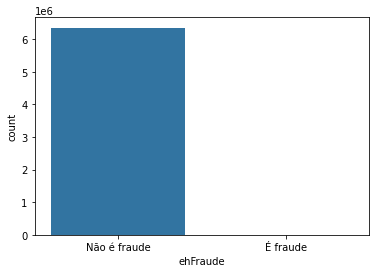

In [29]:
g = sns.countplot(df3.ehFraude)
g.set_xticklabels(['Não é fraude', 'É fraude'])
plt.show();

Identificando correlações entre variáveis através de um mapa de calor.

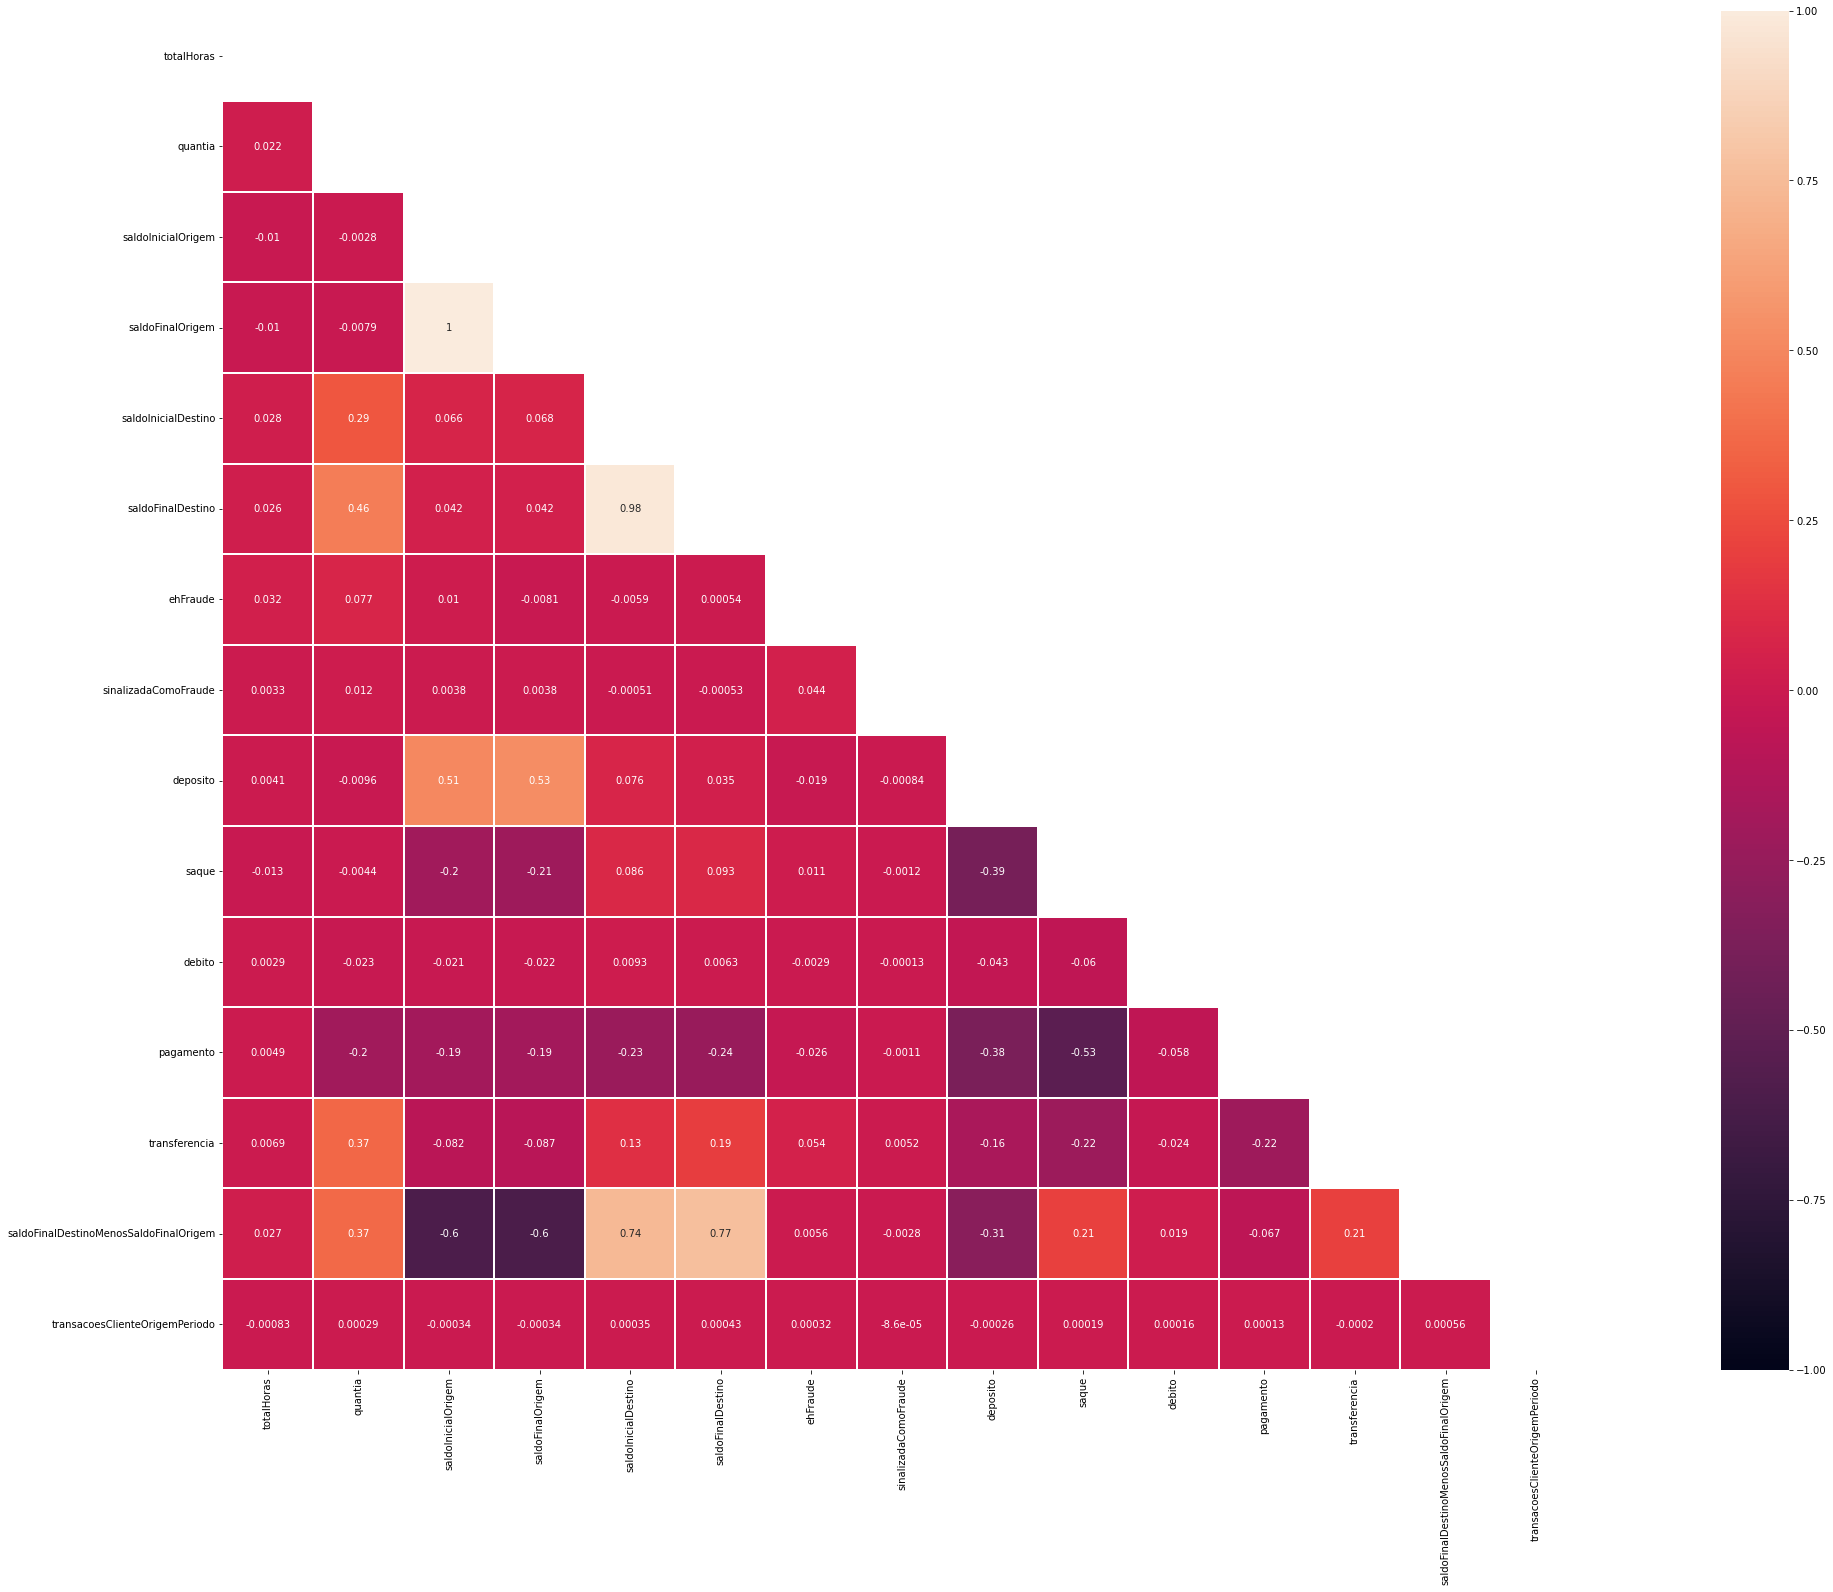

In [30]:
import numpy as np

mask = np.triu(np.ones_like(df3.corr(), dtype=np.bool))
plt.figure(figsize=(50,25))
sns.heatmap(df3.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, linewidths=1.5)
plt.show();

As features saldoFinalOrigem e saldoInicialOrigem tem um forte correlação (~1) enquanto saldoFinalDestino e saldoInicialDestino também tem uma forte correlação (0.98). A feature saldoFinalDestinoMenosSaldoFinalOrigem que criei também tem uma alta correlação com as features saldoInicialDestino e saldoFinalDestino, 0.74 e 0.77, respectivamente.

# Dividindo o dataset em treino e teste

Definindo as colunas que vamos usar e a variável target.

In [31]:
variaveis = df3[["totalHoras", "quantia", "saldoFinalOrigem", "saldoFinalDestino", "sinalizadaComoFraude", "saque", "deposito", "pagamento", "debito", "transferencia", "transacoesClienteDestinoPeriodo", "transacoesClienteOrigemPeriodo"]]
target = df3.ehFraude

KeyError: "['transacoesClienteDestinoPeriodo'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(variaveis, target, test_size=0.25, random_state=101)

# Balanceamento da base de treino

Importando os recursos necessários

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

## Logistic Regression - Baseline

In [ ]:
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)
y_pred_baseline = logreg_baseline.predict(X_test)
confusion_matrix(y_test, y_pred_baseline)

In [ ]:
print(classification_report(y_test, y_pred_baseline, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg_baseline, X_train, y_train, name='Baseline')
plt.show()

In [ ]:
metrics.plot_roc_curve(logreg_baseline, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Classes Weights ('balanced')

In [ ]:
logreg_balanced = LogisticRegression(class_weight='balanced')
logreg_balanced.fit(X_train, y_train)
y_pred = logreg_balanced.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg_balanced, X_train, y_train, name='Baseline')
plt.show()

In [ ]:
metrics.plot_roc_curve(logreg_balanced, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Classes Weights (custom)

In [ ]:
logreg_balanced_custom = LogisticRegression(class_weight={0: 0.15,1: 0.85})
logreg_balanced_custom.fit(X_train, y_train)
y_pred = logreg_balanced_custom.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg_balanced_custom, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Over-sampling

### Random

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
sm = RandomOverSampler(random_state=42, sampling_strategy=0.22)
X_over, y_over = sm.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_over))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_over, y_over)
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.title("Dataset com Over-Sampling Randômico")
plt.show()

### ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

sm = ADASYN(random_state=42, sampling_strategy=0.22)
X_over, y_over = sm.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_over))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_over, y_over)
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=0.22)
X_over, y_over = sm.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_over))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_over, y_over)
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

## Logistic Regression - Under-sampling

### Cluster Centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids 

print('Antes %s' % Counter(y_train))
cc = ClusterCentroids(random_state=42, sampling_strategy=0.35)
X_under, y_under = cc.fit_resample(X_train, y_train)
print('Resultado após o under sampling %s' % Counter(y_under))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg, X_test, y_test, 
                                              name='Under-sampling - Centroids')

### Randômico

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

print('Antes %s' % Counter(y_train))
cc = RandomUnderSampler(random_state=42, sampling_strategy=0.35)
X_under, y_under = cc.fit_resample(X_train, y_train)
print('Resultado após o under sampling %s' % Counter(y_under))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_under, y_under)
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg, X_test, y_test, 
                                              name='Random')

## Over sampling e Under sampling

### Proporção de 1:2

In [ ]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42, sampling_strategy=0.5)

print('Antes %s' % Counter(y_train))

X_res, y_res = sme.fit_resample(X_train, y_train)
print('Resultado após a aplicação das duas estratégias combinadas %s' % Counter(y_res))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test, name='Baseline')
plt.show()

### Proporção de 1:10

In [ ]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42, sampling_strategy=0.1)

print('Antes %s' % Counter(y_train))

X_res, y_res = sme.fit_resample(X_train, y_train)
print('Resultado após a aplicação das duas estratégias combinadas %s' % Counter(y_res))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test, name='Baseline')
plt.show()